# Subsimulation learning rate

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from scipy.stats import truncnorm

import numba as nb

In [2]:
from sedgen import initialization as ini
from sedgen import general as gen
from sedgen import preprocessing

In [3]:
%load_ext line_profiler
%load_ext memory_profiler

In [4]:
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
# Reload all packages (except those excluded by %aimport) every time 
# before executing the Python code typed.
%autoreload 2

____

In [ ]:
sedgen_CA_NS.simulate_N_crystals()

In [29]:
a = (np.log(1/256) - np.log(sedgen_CA_NS.csd_means[0])) / sedgen_CA_NS.csd_stds[0]
b = (np.log(30) - np.log(sedgen_CA_NS.csd_means[0])) / sedgen_CA_NS.csd_stds[0]

In [36]:
a

-5.310769674842248

(array([1838., 1720., 1753., ..., 1453., 1458., 1469.]),
 array([-5.54517648, -5.53921223, -5.53324798, ...,  3.38926537,
         3.39522961,  3.40119386]),
 <BarContainer object of 1500 artists>)

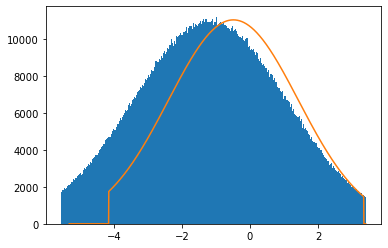

In [35]:
plt.hist(sedgen_CA_NS.csds[0].rvs(10000000), bins=1500)
plt.plot(np.linspace(a, np.log(30), 1501), sedgen_CA_NS.csds[0].pdf(np.log(sedgen_CA_NS.size_bins)) * 60000)

(array([1704., 1750., 1683., ..., 1473., 1469., 1440.]),
 array([-17.28247923, -17.26458654, -17.24669384, ...,   9.52077481,
          9.5386675 ,   9.5565602 ]),
 <BarContainer object of 1500 artists>)

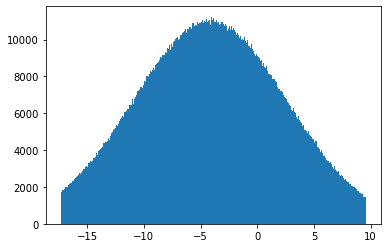

In [11]:
plt.hist(np.log(gen.calculate_volume_sphere(np.exp(sedgen_CA_NS.csds[0].rvs(10000000)))), bins=1500)

In [17]:
np.exp(sedgen_CA_NS.csd_means[0])

1.362062370503422

In [19]:
np.exp(sedgen_CA_NS.csd_stds[0])

2.2773215645191884

In [20]:
cvd_mean_0 = np.log(gen.calculate_volume_sphere(np.exp(sedgen_CA_NS.csd_means[0])))
cvd_std_0 = np.log(gen.calculate_volume_sphere(np.exp(sedgen_CA_NS.csd_stds[0])))
trunc_left = gen.calculate_volume_sphere(1/256)
trunc_right = gen.calculate_volume_sphere(30)

In [63]:
np.log(gen.calculate_volume_sphere(np.exp(sedgen_CA_NS.csds[0].rvs(1_000_000)))).mean()

-4.0899270761267985

In [73]:
np.log(cvd_mean_0)

-1.2730713363185293

In [95]:
pdf_norm = sedgen_CA_NS.csds[0].pdf(np.log(sedgen_CA_NS.size_bins)) / np.sum(sedgen_CA_NS.csds[0].pdf(np.log(sedgen_CA_NS.size_bins)))

In [181]:
sizes = pdf_norm * 1e9

In [125]:
gen.calculate_equivalent_circular_diameter(1e9)

1240.7009817987996

In [182]:
nr = np.log(sizes) / sedgen_CA_NS.volume_bins

C:\Users\u0108248\AppData\Local\Continuum\miniconda3\envs\sedgen\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


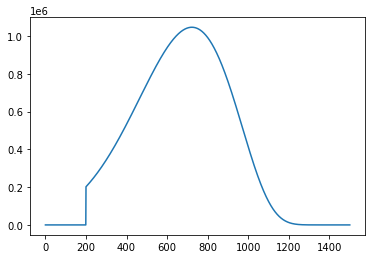

In [183]:
plt.plot(sizes / np.exp(sedgen_CA_NS.size_bins))

In [196]:
int(1e9 / (0.35 / 1000))

2857142857142

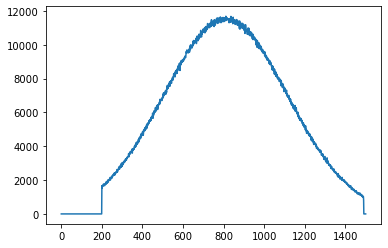

In [176]:
plt.plot(gen.weighted_bin_count(sedgen_CA_NS.crystal_size_array, w=None, ml=1501))

In [172]:
np.sum(sizes / sedgen_CA_NS.size_bins)

202469870.7244935

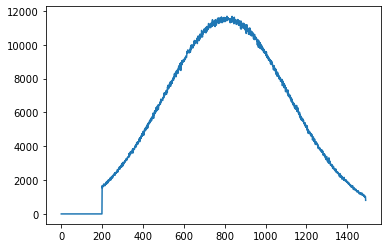

In [144]:
plt.plot(gen.bin_count(sedgen_CA_NS.crystal_size_array))
# plt.plot(sizes)

In [132]:
np.sum(gen.weighted_bin_count(sedgen_CA_NS.crystal_size_array, w=None, ml=1501) * sedgen_CA_NS.size_bins)

12327396.869233357

In [145]:
sedgen_CA_NS.crystal_size_array.size

8541915

In [142]:
sedgen_CA_NS.minerals_N_actual.sum()

8541915

In [92]:
1/256
sedgen_CA_NS.size_bins[200]

0.00390625

0.00390625

In [21]:
def initialize_csd(mean, std, trunc_left=1/256, trunc_right=30):
    """Initalizes the truncated lognormal crystal size distribution

    Parameters:
    -----------
    m : int
        Number specifying mineral class
    trunc_left : float(optional)
        Value to truncate lognormal distribution to on left side,
        i.e. smallest values
    trunc_right : float(optional)
        Value to truncate lognormal distribution to on right side,
        i.e. biggest values

    Returns:
    --------
    csd : scipy.stats.truncnorm
        Truncated lognormal crystal size distribution
    """

    mean = np.log(mean)
    std = np.exp(std)

    if not np.isinf(trunc_left):
        trunc_left = np.log(trunc_left)

    if not np.isinf(trunc_right):
        trunc_right = np.log(trunc_right)

    a, b = (trunc_left - mean) / std, (trunc_right - mean) / std
    csd = truncnorm(loc=mean, scale=std, a=a, b=b)

    return csd

In [22]:
cvd_trunc = initialize_csd(cvd_mean_0, cvd_std_0, trunc_left, trunc_right)

In [26]:
cvd_trunc.mean()

-1.7399046840996732

In [32]:
np.log(gen.calculate_volume_sphere(np.exp(sedgen_CA_NS.csds[0].mean())))

-4.096627675742213

In [37]:
np.exp(sedgen_CA_NS.csds[0].mean())

0.3166791917991695

In [42]:
sedgen_CA_NS.csds[0].std()

0.6858310906835234

In [40]:
sedgen_CA_NS.csd_stds[0]

0.823

(array([ 11215.,  28118.,  59045., 102557., 147506., 175566., 175362.,
        144234.,  99711.,  56686.]),
 array([-17.28252451, -14.59861758, -11.91471065,  -9.23080372,
         -6.54689678,  -3.86298985,  -1.17908292,   1.50482401,
          4.18873094,   6.87263788,   9.55654481]),
 <BarContainer object of 10 artists>)

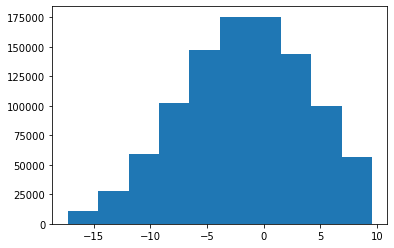

In [30]:
plt.hist(cvd_trunc.rvs(1_000_000))

(array([ 37550.,  68322., 106478., 141574., 162345., 159088., 134680.,
         97061.,  60570.,  32332.]),
 array([-17.28235782, -14.59849016, -11.91462251,  -9.23075485,
         -6.5468872 ,  -3.86301954,  -1.17915189,   1.50471577,
          4.18858342,   6.87245107,   9.55631873]),
 <BarContainer object of 10 artists>)

(array([ 11287.,  28440.,  59028., 102559., 147447., 175780., 175191.,
        144721.,  99162.,  56385.]),
 array([-17.28240021, -14.598509  , -11.91461779,  -9.23072658,
         -6.54683537,  -3.86294416,  -1.17905295,   1.50483825,
          4.18872946,   6.87262067,   9.55651188]),
 <BarContainer object of 10 artists>)

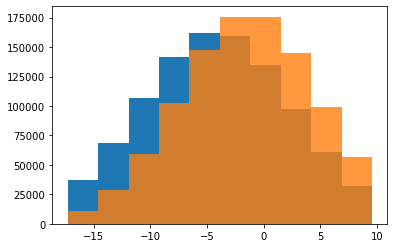

In [60]:
plt.hist(np.log(gen.calculate_volume_sphere(np.exp(sedgen_CA_NS.csds[0].rvs(1_000_000)))))
plt.hist(cvd_trunc.rvs(1_000_000), alpha=0.8)